In [36]:
!pip install matplotlib pandas numpy seaborn scikit-learn

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [38]:
data = pd.read_csv('Laptop-Price.csv')
print(data.head())

  Company          Product   TypeName  Inches             ScreenResolution  \
0      HP           250 G6   Notebook    15.6            Full HD 1920x1080   
1    Acer         Aspire 3   Notebook    15.6                     1366x768   
2    Asus  ZenBook UX430UN  Ultrabook    14.0            Full HD 1920x1080   
3    Acer          Swift 3  Ultrabook    14.0  IPS Panel Full HD 1920x1080   
4      HP           250 G6   Notebook    15.6                     1366x768   

    Ram       OpSys Cpu Brand       Cpu Model Cpu Rate  SSD  HDD  \
0   8GB       No OS     Intel   Core i5 7200U   2.5GHz  256    0   
1   4GB  Windows 10       AMD  A9-Series 9420     3GHz    0  500   
2  16GB  Windows 10     Intel   Core i7 8550U   1.8GHz  512    0   
3   8GB  Windows 10     Intel   Core i5 8250U   1.6GHz  256    0   
4   4GB       No OS     Intel   Core i5 7200U   2.5GHz    0  500   

   Flash Storage  Hybrid Gpu Brand         Gpu Model  Unnamed: 16  Price_euros  
0              0       0     Intel   HD G

In [39]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1146 non-null   object 
 1   Product           1146 non-null   object 
 2   TypeName          1146 non-null   object 
 3   Inches            1146 non-null   float64
 4   ScreenResolution  1146 non-null   object 
 5   Ram               1146 non-null   object 
 6   OpSys             1146 non-null   object 
 7   Cpu Brand         1146 non-null   object 
 8   Cpu Model         1146 non-null   object 
 9   Cpu Rate          1146 non-null   object 
 10  SSD               1146 non-null   int64  
 11  HDD               1146 non-null   int64  
 12  Flash Storage     1146 non-null   int64  
 13  Hybrid            1146 non-null   int64  
 14  Gpu Brand         1146 non-null   object 
 15  Gpu Model         1146 non-null   object 
 16  Unnamed: 16       0 non-null      float64


In [40]:
# Check the shape of the DataFrame
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())


Dataset contains 1146 rows and 18 columns.
Missing values per column:
Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
Ram                    0
OpSys                  0
Cpu Brand              0
Cpu Model              0
Cpu Rate               0
SSD                    0
HDD                    0
Flash Storage          0
Hybrid                 0
Gpu Brand              0
Gpu Model              0
Unnamed: 16         1146
Price_euros            0
dtype: int64


In [41]:
print(data.describe())

            Inches          SSD          HDD  Flash Storage       Hybrid  \
count  1146.000000  1146.000000  1146.000000    1146.000000  1146.000000   
mean     15.151396   187.710297    46.347295       1.898778     0.539267   
std       1.319303   160.313927   144.192738      26.275202    15.035060   
min      11.300000     0.000000     0.000000       0.000000     0.000000   
25%      14.000000     0.000000     0.000000       0.000000     0.000000   
50%      15.600000   256.000000     0.000000       0.000000     0.000000   
75%      15.600000   256.000000     1.000000       0.000000     0.000000   
max      18.400000   512.000000   500.000000     512.000000   508.000000   

       Unnamed: 16  Price_euros  
count          0.0  1146.000000  
mean           NaN  1204.876972  
std            NaN   676.630847  
min            NaN   265.000000  
25%            NaN   699.750000  
50%            NaN  1049.750000  
75%            NaN  1535.000000  
max            NaN  6099.000000  


In [42]:
print(data.corr)

<bound method DataFrame.corr of      Company                                    Product            TypeName  \
0         HP                                     250 G6            Notebook   
1       Acer                                   Aspire 3            Notebook   
2       Asus                            ZenBook UX430UN           Ultrabook   
3       Acer                                    Swift 3           Ultrabook   
4         HP                                     250 G6            Notebook   
...      ...                                        ...                 ...   
1141    Dell                              Inspiron 3567            Notebook   
1142    Asus  X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce            Notebook   
1143  Lenovo                             Yoga 500-14ISK  2 in 1 Convertible   
1144  Lenovo                             Yoga 900-13ISK  2 in 1 Convertible   
1145      HP        15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook   

      Inches       

In [43]:
# Convert categorical columns to consistent case (lowercase)
categorical_cols = ['Company', 'TypeName', 'OpSys', 'Cpu Brand', 'Gpu Brand']
for col in categorical_cols:
    data[col] = data[col].str.strip().str.lower()


In [44]:
from typing_extensions import dataclass_transform
# Function to extract numeric value from strings
def extract_numeric(x):
    if isinstance(x, str):
        return float(x.lower().replace('gb', '').replace('ghz', '').strip())
    return x

# Apply the function to relevant columns
data['Ram'] = data['Ram'].apply(extract_numeric).astype(int)
data['Cpu Rate'] = data['Cpu Rate'].apply(extract_numeric)
data['SSD'] = data['SSD'].apply(extract_numeric).astype(int)
data['HDD'] = data['HDD'].apply(extract_numeric).astype(int)
data['Flash Storage'] = data['Flash Storage'].apply(extract_numeric).astype(int)


In [45]:
# Create binary features for Full HD and IPS
data['Is_FullHD'] = data['ScreenResolution'].apply(lambda x: 1 if 'full hd' in x.lower() else 0)
data['Is_IPS'] = data['ScreenResolution'].apply(lambda x: 1 if 'ips' in x.lower() else 0)

# Drop the original 'ScreenResolution' column
data.drop(['ScreenResolution'], axis=1, inplace=True)

print(data.head())


  Company          Product   TypeName  Inches  Ram       OpSys Cpu Brand  \
0      hp           250 G6   notebook    15.6    8       no os     intel   
1    acer         Aspire 3   notebook    15.6    4  windows 10       amd   
2    asus  ZenBook UX430UN  ultrabook    14.0   16  windows 10     intel   
3    acer          Swift 3  ultrabook    14.0    8  windows 10     intel   
4      hp           250 G6   notebook    15.6    4       no os     intel   

        Cpu Model  Cpu Rate  SSD  HDD  Flash Storage  Hybrid Gpu Brand  \
0   Core i5 7200U       2.5  256    0              0       0     intel   
1  A9-Series 9420       3.0    0  500              0       0       amd   
2   Core i7 8550U       1.8  512    0              0       0    nvidia   
3   Core i5 8250U       1.6  256    0              0       0     intel   
4   Core i5 7200U       2.5    0  500              0       0     intel   

          Gpu Model  Unnamed: 16  Price_euros  Is_FullHD  Is_IPS  
0   HD Graphics 620          Na

In [46]:
# Drop 'Unnamed: 16', 'Hybrid', and 'Product' columns
data.drop(['Unnamed: 16', 'Hybrid', 'Product'], axis=1, inplace=True)

# Verify the columns have been dropped
print("Remaining Columns:")
print(data.columns)


Remaining Columns:
Index(['Company', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Cpu Brand',
       'Cpu Model', 'Cpu Rate', 'SSD', 'HDD', 'Flash Storage', 'Gpu Brand',
       'Gpu Model', 'Price_euros', 'Is_FullHD', 'Is_IPS'],
      dtype='object')


In [47]:
# Convert categorical columns to consistent case (lowercase)
categorical_cols = ['Company', 'TypeName', 'OpSys', 'Cpu Brand', 'Gpu Brand']
for col in categorical_cols:
    data[col] = data[col].str.strip().str.lower()


In [48]:

# Initialize LabelEncoder
le = LabelEncoder()

# List of columns to encode
label_encode_cols = ['Company', 'TypeName', 'OpSys', 'Cpu Brand', 'Gpu Brand']

for col in label_encode_cols:
    data[col] = le.fit_transform(data[col])

# Display the first few rows to verify encoding
print(data.head())


   Company  TypeName  Inches  Ram  OpSys  Cpu Brand       Cpu Model  Cpu Rate  \
0        6         3    15.6    8      3          1   Core i5 7200U       2.5   
1        0         3    15.6    4      4          0  A9-Series 9420       3.0   
2        2         4    14.0   16      4          1   Core i7 8550U       1.8   
3        0         4    14.0    8      4          1   Core i5 8250U       1.6   
4        6         3    15.6    4      3          1   Core i5 7200U       2.5   

   SSD  HDD  Flash Storage  Gpu Brand         Gpu Model  Price_euros  \
0  256    0              0          1   HD Graphics 620        575.0   
1    0  500              0          0         Radeon R5        400.0   
2  512    0              0          2     GeForce MX150       1495.0   
3  256    0              0          1  UHD Graphics 620        770.0   
4    0  500              0          1   HD Graphics 620        393.9   

   Is_FullHD  Is_IPS  
0          1       0  
1          0       0  
2          

In [49]:
# Create 'Total_Storage' by summing SSD, HDD, and Flash Storage
data['Total_Storage'] = data['SSD'] + data['HDD'] + data['Flash Storage']

# Drop individual storage columns
data.drop(['SSD', 'HDD', 'Flash Storage'], axis=1, inplace=True)

# Display the first few rows to verify
print(data.head())


   Company  TypeName  Inches  Ram  OpSys  Cpu Brand       Cpu Model  Cpu Rate  \
0        6         3    15.6    8      3          1   Core i5 7200U       2.5   
1        0         3    15.6    4      4          0  A9-Series 9420       3.0   
2        2         4    14.0   16      4          1   Core i7 8550U       1.8   
3        0         4    14.0    8      4          1   Core i5 8250U       1.6   
4        6         3    15.6    4      3          1   Core i5 7200U       2.5   

   Gpu Brand         Gpu Model  Price_euros  Is_FullHD  Is_IPS  Total_Storage  
0          1   HD Graphics 620        575.0          1       0            256  
1          0         Radeon R5        400.0          0       0            500  
2          2     GeForce MX150       1495.0          1       0            512  
3          1  UHD Graphics 620        770.0          1       1            256  
4          1   HD Graphics 620        393.9          0       0            500  


In [61]:
# Display the current columns in the DataFrame
print("Current Columns in the DataFrame:")
print(data.columns)


Current Columns in the DataFrame:
Index(['Company', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Cpu Brand',
       'Cpu Rate', 'Gpu Brand', 'Price_euros', 'Is_FullHD', 'Is_IPS',
       'Total_Storage'],
      dtype='object')


In [62]:
# Check data types of all columns
print("Data Types of Each Column:")
print(data.dtypes)


Data Types of Each Column:
Company            int64
TypeName           int64
Inches           float64
Ram                int64
OpSys              int64
Cpu Brand          int64
Cpu Rate         float64
Gpu Brand          int64
Price_euros      float64
Is_FullHD          int64
Is_IPS             int64
Total_Storage      int64
dtype: object


In [50]:

# Define features (X) and target (y)
X = data.drop(['Price_euros'], axis=1)
y = data['Price_euros']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (916, 13), Testing set: (230, 13)


In [51]:
# Drop 'Cpu Model' and 'Gpu Model' columns
data.drop(['Cpu Model', 'Gpu Model'], axis=1, inplace=True)

# Verify the columns have been dropped
print("Columns after dropping 'Cpu Model' and 'Gpu Model':")
print(data.columns)


Columns after dropping 'Cpu Model' and 'Gpu Model':
Index(['Company', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Cpu Brand',
       'Cpu Rate', 'Gpu Brand', 'Price_euros', 'Is_FullHD', 'Is_IPS',
       'Total_Storage'],
      dtype='object')


In [63]:
# Define features (X) and target (y)
X = data.drop(['Price_euros'], axis=1)
y = data['Price_euros']

# Split into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (916, 11), Testing set: (230, 11)


In [64]:
print(data.head())

   Company  TypeName  Inches  Ram  OpSys  Cpu Brand  Cpu Rate  Gpu Brand  \
0        6         3    15.6    8      3          1       2.5          1   
1        0         3    15.6    4      4          0       3.0          0   
2        2         4    14.0   16      4          1       1.8          2   
3        0         4    14.0    8      4          1       1.6          1   
4        6         3    15.6    4      3          1       2.5          1   

   Price_euros  Is_FullHD  Is_IPS  Total_Storage  
0        575.0          1       0            256  
1        400.0          0       0            500  
2       1495.0          1       0            512  
3        770.0          1       1            256  
4        393.9          0       0            500  


In [66]:


# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optional: Convert scaled data back to DataFrame for better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Verify the scaled data
print("Scaled Training Data:")
print(X_train_scaled.head())


Scaled Training Data:
    Company  TypeName    Inches       Ram     OpSys  Cpu Brand  Cpu Rate  \
0  0.624009  1.144168 -0.861554 -0.163959  0.126971   0.237732  0.725650   
1 -1.006006 -1.223433  1.617792  4.616525  0.126971   0.237732  0.725650   
2 -0.734337  1.144168 -1.387476 -0.163959  0.126971   0.237732 -1.472093   
3 -1.549344  0.354968  0.340553 -0.960707  0.126971   0.237732  0.237262   
4 -1.006006 -1.223433  0.340553 -0.163959  0.126971  -4.206409  1.458230   

   Gpu Brand  Is_FullHD    Is_IPS  Total_Storage  
0  -0.233206   0.643102  1.605654       1.611679  
1   1.240013   0.643102  1.605654       1.611679  
2  -0.233206   0.643102  1.605654       0.113636  
3   1.240013   0.643102 -0.622799      -1.378556  
4  -1.706425   0.643102 -0.622799      -1.378556  


In [67]:


# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)


In [68]:

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Absolute Error (MAE): {mae:.2f} euros")
print(f"Mean Squared Error (MSE): {mse:.2f} euros²")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} euros")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 209.84 euros
Mean Squared Error (MSE): 97441.18 euros²
Root Mean Squared Error (RMSE): 312.16 euros
R² Score: 0.80


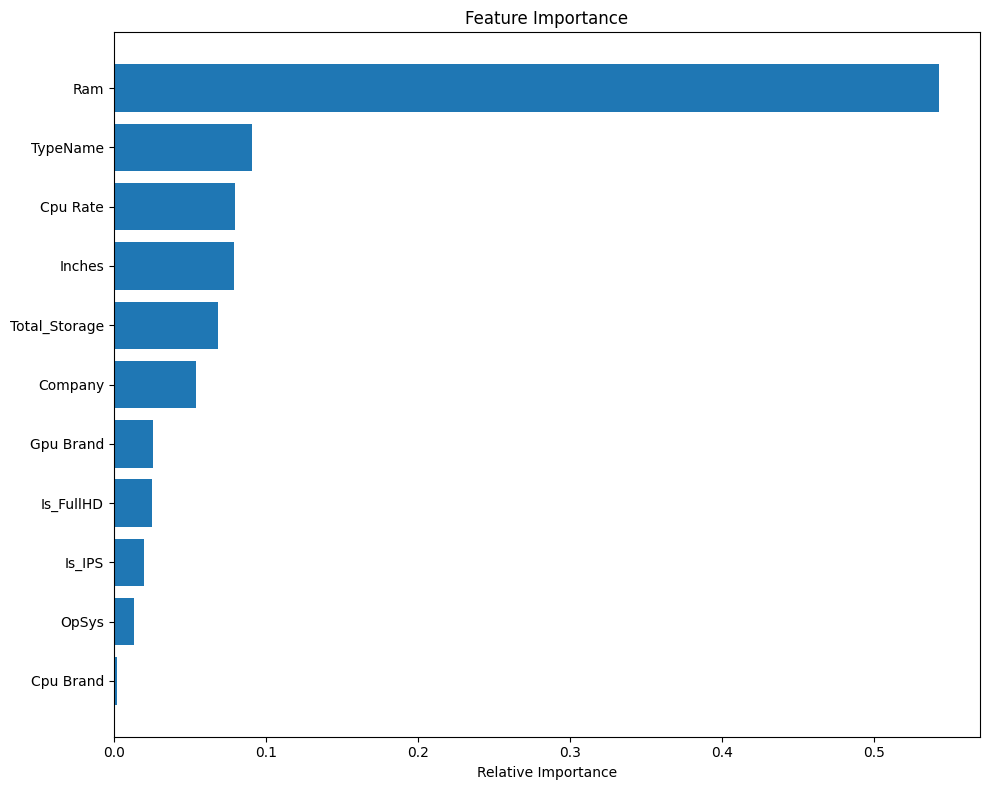

In [70]:
# Retrieve feature importances
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()
